# WeatherPy

## Analysis

### Temperature
The highest maximum daily temperatures on March 4, 2018 were reached in cities located between -40 and +20 degrees in latitude, correspondent to South America, Australia, and South-Central Africa.  This is not particularly surprsing, as in these latitudes March is late summer.
Going North, the maximum daily temperatures progressively fall, to reach -30 degrees Celsius between the 50th and 80th parallel, correspondent to Canada, Russia and Greenland.

### Cloudiness
Belonging to a certain parallel doesn't seem to guarantee that the city located there is going to be particualarly cloudy or otherwise.  Particular longitudes, in this case, could probably be a better indicator.

### Humidity
Not surprisingly, in March humidity is generally high (60%+) around the world.
The only regions where, sometimes, is low are those with latitudes between -20 and -60 degrees (Argentina, Australia, South Africa) and 10 to 40 degrees (Northern Africa, China, United States).
It's important to stress the term "sometimes", as in these regions too most of cities have a high humidity rates in March.  The note above refers only to the fact that in these parallels, more than in others, there are also several cities that, in March, are not really humid at all.

### Wind Speed
Opposite to humidity, in March wind speed is generally contained (less than 15 kph, or about 10 mph) all around the world.
Although a larger aggregation of dots seems to be concentrated in the northern emisphere, not too many conclusions should be drawn from this, considering that there may be many more recorded cities in the northern, vs. the southern, emisphere.

In [ ]:
# MODULES
    
# 1) "matplotlib" and "seaborn" were imported because we want to make charts (seaborn, built on top of matplotlib, is 
#    a library to make particularly attractive charts)
# 2) "numpy" was imported because we wanted to use the "random.uniform" function, which is part of numpy
# 3) "pandas" was imported because we want to do this exercise in Pandas
# 4) "requests" was imported because we want to send requests to a URL and we don't want to do it 
#    manually, meaning that we don't want to send individual query strings or things of that sort
#    requests was also installed (pip install requests) in the folder hosting the homework
# 5) "time" is imported because we may want to make use of dates and things of that sort
# 6) Authored by an MIT student (Winston Chen), "citipy" wass imported because it allows users to 
#    locate cities by coordinates (e.g., latituted and longitude) instead of by names
#    citipy was also pip installed in the folder hosting the homework

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import requests as req
import time
from citipy import citipy

In [ ]:
# OUTPUT FILES

# Generate output CSV file, called "output.csv" and placed in a "output" folder, itself to be located in the same 
# folder as this "WeatherPySolvedByMe" file

output = "output/output.csv"

In [26]:
# CITIES

# Create lists (intially empty) that gather the cities' latitudes, longitudes, and the unique cities names
# Unique are the cities that are not going to be repeated when we are going to make the download from the website later

latLongTuples = []
uniqueCities = []

# Create a series of random latitude-longitude pairs by using the numpy function "np.random.uniform"
# np.random.uniform(-90,90,1000) draws 1000 random samples uniformly distributed from the number -90 (included) to 
# the number 90 (excluded)
# The number of samples was initally set at 1000 and then, after testing it later in the code, increased to make it 
# large enough to reach the requested 500 cities with unique cordinates (see later)
# Latitude of -90 degrees is related to the South Pole, 90 degrees the the North Pole
# Longitude of 180 (+ or - doesn't matter in this case) is related to East Siberia or the Bering Sea

latitude = np.random.uniform(-90,90,1400)
longitude = np.random.uniform(-180,180,1400)

# To print the first ten elements, you would want to do:
# latitude[:9]

In [27]:
# Zip the lists latitude and longitude into the list of tuples defined before

latLongTuples = zip(latitude, longitude)

# To print the tuples, you would want to do:
# for i in latLongTuples:
#    print (i)

In [28]:
# For each tuple, find the city closest to the coordinates reported by the related tuple
# The first element of each tuple, [0], is the latitude; the second one, [1], the longitude
# The terms "nearest_city" and "city_name" come from the module "citipy"

for i in latLongTuples:
    nearestCity = citipy.nearest_city(i[0], i[1]).city_name
    
    # Add to the above-defined, and initially empty, "uniqueCities" list, cities that are NOT already in it 
    
    if nearestCity not in uniqueCities:
        uniqueCities.append(nearestCity)

# To print the first ten cities in the uniqueCities list, do:
# uniqueCities[:9]

In [29]:
# Verify that, as per the homework instructions, there are at least 500 cities in this list
# If not, go back to the beginning of the "CITIES" section above and increase the number of randomnly generated 
# coordinates

len(uniqueCities)

586

In [31]:
# API CALLS

# OpenWeatherMap API key, previously received by making a requested to the OpenWeather site

APIkey = "e507ebac51e7a585f80f3cfc8b728c43"

# URL for Weather Map API call, also retrieved from the OpenWeather site

URL = "http://api.openweathermap.org/data/2.5/weather?"

# For each city, create an query URL

queryURL = URL + "appid=" + APIkey + "&q="
    
# Create a list (intially empty) to gather the various pieces of city information

cityList = []

# Loop through the uniqueCities list to download the data from the site and append the data to the list cityList

for i in uniqueCities:
    print(str(queryURL)+str(i))
    cityResponse = req.get(queryURL+i)
    cityJSON = cityResponse.json()
    cityList.append(cityJSON)

http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=ngukurr
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=salalah
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=avera
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=aflu
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=faya
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=tiksi
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=barentsburg
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=mataura
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=camargo
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=hovd
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=balykshi
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=mandera
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=marovoay
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=dunedin
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=tarime
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=kholtoson
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=pemangkat
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=constitucion
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=bitkine
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=sorong
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=saint george
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=andenes
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=bongandanga
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=narsaq
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=forbes
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=tsiroanomandidy
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=namatanai
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=machiques
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=padang
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=maningrida
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=nhulunbuy
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=bouna
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=dolzhanskaya
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=hunza
http://api.openweathe

http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=jining
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=sistranda
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=codajas
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=savannakhet
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=ibra
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=chapais
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=tamandare
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=vostok
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=brae
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=de aar
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=sassandra
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=merauke
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=phalombe
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=malacacheta
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=tyukhtet
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=aquiraz
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=ikongo
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=matamoros
http://api.openweathermap.org/data/

http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=huasahuasi
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=joshimath
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=black river
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=jiangyou
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=harper
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=show low
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=kavieng
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=bay-khaak
http://api.openweathermap.org/data/2.5/weather?appid=e507ebac51e7a585f80f3cfc8b728c43&q=berlevag
http://api.openweathe

In [32]:
# Print the first element of the list cityList to better define the information lists below

cityList[0]

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 62.45, 'lon': -114.38},
 'dt': 1520190000,
 'id': 6185377,
 'main': {'humidity': 84,
  'pressure': 1029,
  'temp': 259.15,
  'temp_max': 259.15,
  'temp_min': 259.15},
 'name': 'Yellowknife',
 'sys': {'country': 'CA',
  'id': 3558,
  'message': 0.0034,
  'sunrise': 1520173679,
  'sunset': 1520212277,
  'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'broken clouds',
   'icon': '04d',
   'id': 803,
   'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 1.5}}

In [33]:
# Create empty lists that will be filled with the desired information later

name=[]
country=[]
lat=[]
long=[]
maxTemp=[]
cloudiness=[]
humidity=[]
windSpeed=[]
date=[]

# Loop through the cityList elements to fill in the above-defined lists
# Also, exclude cod=404 correspondent to "city not found"

for i in cityList:
    if(i["cod"])!="404":
        name.append(i["name"])
        country.append(i["sys"]["country"])
        lat.append(i["coord"]["lat"])
        long.append(i["coord"]["lon"])
        date.append(i["dt"])
        maxTemp.append(i["main"]["temp_max"])
        cloudiness.append(i["clouds"]["all"])
        humidity.append(i["main"]["humidity"])
        windSpeed.append(i["wind"]["speed"])

In [34]:
# Create dataframe with columns in logical order

cityDF = pd.DataFrame({"City":name,"Country":country,"Latitude (degrees)":lat,"Longitude (degrees)":long,"Date":date,
                       "Max Temperature (K)": maxTemp, "Cloudiness (%)":cloudiness,"Humidity (%)":humidity,  
                       "Wind Speed (mph)":windSpeed},
                      columns=["City","Country","Latitude (degrees)","Longitude (degrees)","Date","Max Temperature (K)",
                              "Cloudiness (%)","Humidity (%)","Wind Speed (mph)"])
cityDF.head()

,City,Country,Latitude (degrees),Longitude (degrees),Date,Max Temperature (K),Cloudiness (%),Humidity (%),Wind Speed (mph)
0,Yellowknife,CA,62.45,-114.38,1520190000,259.15,75,84,1.5
1,Salalah,OM,17.01,54.10,1520193000,298.15,0,57,1.5
2,Avera,US,33.19,-82.53,1520193300,292.15,1,16,3.1
3,Ushuaia,AR,-54.81,-68.31,1520193600,283.15,40,61,13.9
4,Faya,SA,18.39,42.45,1520193600,290.15,0,87,4.1


In [54]:
# Convert temperatures from Kelvin to centigrade and wind speeds from mph to kph

maxTempCelsius=cityDF["Max Temperature (K)"]-273.15
windSpeedKPH=cityDF["Wind Speed (mph)"]*1.60934
cityDF2 = pd.DataFrame({"City":name,"Country":country,"Latitude (degrees)":lat,"Longitude (degrees)":long,"Date":date,
                       "Max Temperature (C)": maxTempCelsius, "Cloudiness (%)":cloudiness,"Humidity (%)":humidity,  
                       "Wind Speed (kph)":windSpeedKPH},
                      columns=["City","Country","Latitude (degrees)","Longitude (degrees)","Date","Max Temperature (C)",
                              "Cloudiness (%)","Humidity (%)","Wind Speed (kph)"])
cityDF2.head()

,City,Country,Latitude (degrees),Longitude (degrees),Date,Max Temperature (C),Cloudiness (%),Humidity (%),Wind Speed (kph)
0,Yellowknife,CA,62.45,-114.38,1520190000,-14.0,75,84,2.414010
1,Salalah,OM,17.01,54.10,1520193000,25.0,0,57,2.414010
2,Avera,US,33.19,-82.53,1520193300,19.0,1,16,4.988954
3,Ushuaia,AR,-54.81,-68.31,1520193600,10.0,40,61,22.369826
4,Faya,SA,18.39,42.45,1520193600,17.0,0,87,6.598294


In [55]:
# Export this dataframe into a CSV file, calling the first column "Record No.", which is the index of the dataframe,
# not the "id" element of the cityList list

cityDF2.to_csv(output, index_label="Record No.")

# Count the number of records and show it
cityDF2.count()

City                   521
Country                521
Latitude (degrees)     521
Longitude (degrees)    521
Date                   521
Max Temperature (C)    521
Cloudiness (%)         521
Humidity (%)           521
Wind Speed (kph)       521
dtype: int64

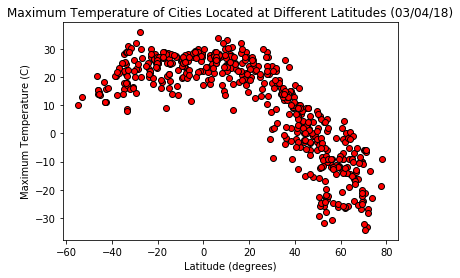

In [79]:
# MAXIMUM TEMPERATURE AT DIFFERENT LATITUDES CHART

# Scatter plot
# The code " (%s)" % time.strftime("%x")" (added in the title right after the generic title) is a clever way to
# capture the date and convert it in the format MM/DD/YY

plt.scatter(lat,maxTempCelsius,marker="o",edgecolor="black",color="red")
plt.title("Maximum Temperature of Cities Located at Different Latitudes (%s)" % time.strftime("%x"))
plt.xlabel("Latitude (degrees)")
plt.ylabel("Maximum Temperature (C)")

# Save chart
plt.savefig("output/MaxTemp.png")

# Show plot
plt.show()

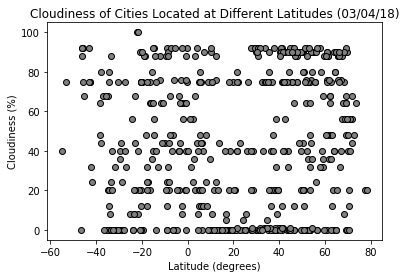

In [76]:
# CLOUDINESS AT DIFFERENT LATITUDES CHART

# Scatter plot
plt.scatter(lat,cloudiness,marker="o",color="gray",edgecolor="black")
plt.title("Cloudiness of Cities Located at Different Latitudes (%s)" % time.strftime("%x"))
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")

# Save chart
plt.savefig("output/Cloudiness.png")

# Show plot
plt.show()

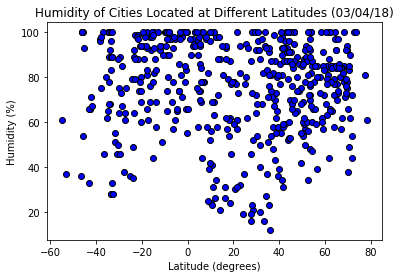

In [77]:
# HUMIDITY AT DIFFERENT LATITUDES CHART

# Scatter plot
plt.scatter(lat,humidity,marker="o",color="blue",edgecolor="black")
plt.title("Humidity of Cities Located at Different Latitudes (%s)" % time.strftime("%x"))
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")

# Save chart
plt.savefig("output/Humidity.png")

# Show plot
plt.show()

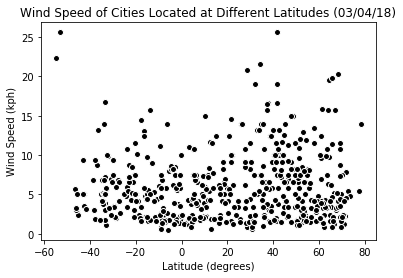

In [78]:
# WIND SPPED AT DIFFERENT LATITUDES CHART

# Scatter plot
plt.scatter(lat,windSpeedKPH,marker="o",color="black",edgecolor="white")
plt.title("Wind Speed of Cities Located at Different Latitudes (%s)" % time.strftime("%x"))
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (kph)")

# Save chart
plt.savefig("output/WindSpeed.png")

# Show plot
plt.show()